# This is the Analysis of the First Part

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import chardet

with open("AMI_GSE66360_series_matrix.csv", "rb") as f:
    result = chardet.detect(f.read(100000))  # Read first 100,000 bytes
    print(result) 



{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [16]:
ROWS_TO_SKIP = 59
FILE_PATH = 'AMI_GSE66360_series_matrix.csv'

raw_df = pd.read_csv(FILE_PATH, skiprows=ROWS_TO_SKIP,  encoding=result['encoding'], header=None).T
GENE_AXIS = 1
SAMPLE_AXIS = 0
raw_df.head()

C:\Users\wmata\AppData\Local\Temp\ipykernel_16540\2125116768.py:4: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv(FILE_PATH, skiprows=ROWS_TO_SKIP,  encoding=result['encoding'], header=None).T


,0,1,2,3,4,5,6,7,8,9,...,54667,54668,54669,54670,54671,54672,54673,54674,54675,54676
0,Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
1,H,GSM1620819,5.866377893,8.22579012,6.17973231,6.179477974,2.792047952,9.290410779,6.998285145,5.348943925,...,13.257325,13.266235,14.57123,14.276568,4.504659,3.139334,2.747015,2.651554,3.413429,3.140612
2,H,GSM1620820,4.948736331,7.525865369,6.628137025,6.58288903,2.69571445,9.462275035,6.558214949,5.410884095,...,13.59386,13.517013,14.738834,14.341233,4.409226,3.039961,2.638606,2.643615,3.399063,3.132691
3,H,GSM1620821,5.148384393,7.764636529,5.859151477,6.602134766,2.580181122,9.116776316,6.851622539,5.254073031,...,13.372759,13.416583,14.627181,14.318568,4.310076,3.220109,2.495261,2.626028,3.53997,3.698396
4,H,GSM1620822,5.064418945,7.198461482,5.974135101,6.545904723,2.712123845,9.134584186,7.357827486,5.242139865,...,13.490226,13.494827,14.754124,14.363297,4.439311,3.263782,2.544199,2.504958,3.396225,3.638612


In [18]:
df = raw_df.copy()
df.columns = raw_df.iloc[0]
df.drop(df.index[0], inplace=True)
# df.set_index('ID_REF')
labels = df[['Class']].copy()
df.drop(columns=['Class'], inplace=True)


In [19]:
df.head()
labels.head()

,Class
1,H
2,H
3,H
4,H
5,H


##### a. High level description of the data and some pre-processing

1) How many genes profiled?


In [20]:
num_genes = df.shape[GENE_AXIS] - 1 # subtract 1 to account for the 'ID_REF' column
print(f"There are {num_genes} genes profiled in the dataset.")

There are 54675 genes profiled in the dataset.


2) How many samples (subjects/patients) in total?


In [21]:
subject = df.shape[SAMPLE_AXIS]
print(f"There are {subject} subjects profiled in the dataset.")

There are 99 subjects profiled in the dataset.


3) How many samples in each class?


In [35]:
healthy_count = (labels == "H")
disease_count = (labels == "M")  # Assuming "D" is the other class

print(f"Healthy samples: {healthy_count.sum().iloc[0]}")
print(f"Disease samples: {disease_count.sum().iloc[0]}")

Healthy samples: 50
Disease samples: 49


4) If there are missing values, then remove the entire row
(gene) from the data matrix.
How many rows left now?

In [36]:
cleaned_df = df.apply(pd.to_numeric, errors='coerce')
cleaned_df = cleaned_df.dropna(axis=GENE_AXIS)
print(f"There are {cleaned_df.shape[GENE_AXIS]} genes left after removing genes with missing values.")

There are 54628 genes left after removing genes with missing values.


5) Pick 20 genes at random. Draw histograms comparing
expression levels of each of these genes in the two
classes M and H.

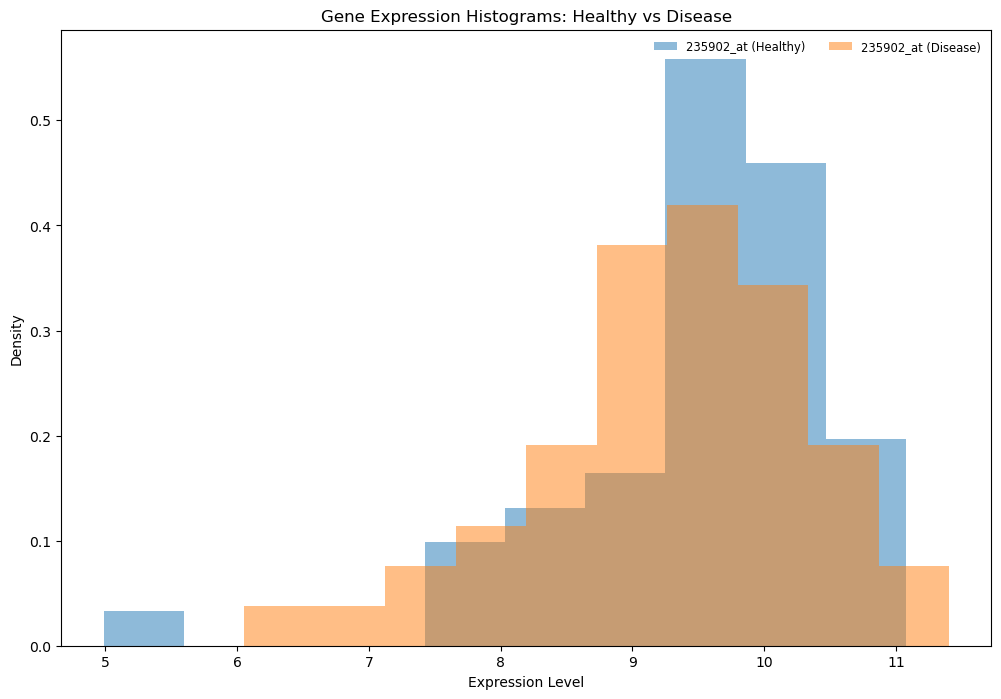

In [74]:
np.random.seed(0)
SAMPLE_AMOUNT = 1
selected_genes = cleaned_df.sample(SAMPLE_AMOUNT, axis=GENE_AXIS).columns
df_healthy  = cleaned_df.loc[labels["Class"] == "H", selected_genes]
df_disease = cleaned_df.loc[labels["Class"] == "M", selected_genes]

plt.figure(figsize=(12, 8))
for gene in selected_genes:
    plt.hist(df_healthy[gene], bins=10, alpha=0.5, label=f"{gene} (Healthy)", density=True)
    plt.hist(df_disease[gene], bins=10, alpha=0.5, label=f"{gene} (Disease)", density=True)

plt.xlabel("Expression Level")
plt.ylabel("Density")
plt.title("Gene Expression Histograms: Healthy vs Disease")
plt.legend(loc = 'upper right', fontsize='small', ncol=2, frameon=False)
plt.show() 